In [1]:
# This Code Does an Import of a CSV file an alternative may be an excel file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
import sweetviz as sv
pd.options.mode.chained_assignment = None

#Phase 1 collecting the data
pd.set_option("expand_frame_repr", False) #Avoids Printing on the next line when you import a dataset
df= pd.read_csv('E:/up/INF791/datasets/final ds/output.csv')
df.columns =["nickname","defender_score","attacker_score","time_sec","winner","level"]
df

,nickname,defender_score,attacker_score,time_sec,winner,level
0,u20444550,8.0,5.0,138.0,Defender,Expert
1,u20444550,8.0,5.0,137.0,Defender,Expert
2,u20444550,10.0,3.0,118.0,Defender,Expert
3,u20444550,8.0,5.0,112.0,Defender,Expert
4,u20444550,9.0,4.0,107.0,Defender,Expert
...,...,...,...,...,...,...
1544,Vader,5.0,8.0,303.0,Attacker,Beginner
1545,Sith,7.0,6.0,288.0,Defender,Beginner
1546,Lulamela,5.0,8.0,287.0,Attacker,Beginner
1547,Lu,6.0,7.0,283.0,Attacker,Beginner


In [2]:
%time #This is used to print out the time of execution of a particcular cell
df.head(3)#This Prints out the first 5 lines if there are no values passed inside the function, any integer value passed inside the function will be the number of rows printed first

CPU times: total: 0 ns
Wall time: 0 ns


,nickname,defender_score,attacker_score,time_sec,winner,level
0,u20444550,8.0,5.0,138.0,Defender,Expert
1,u20444550,8.0,5.0,137.0,Defender,Expert
2,u20444550,10.0,3.0,118.0,Defender,Expert


In [3]:
#prints out the last 5 by default, if no parametter have been passed int the dataset
df.tail()

,nickname,defender_score,attacker_score,time_sec,winner,level
1544,Vader,5.0,8.0,303.0,Attacker,Beginner
1545,Sith,7.0,6.0,288.0,Defender,Beginner
1546,Lulamela,5.0,8.0,287.0,Attacker,Beginner
1547,Lu,6.0,7.0,283.0,Attacker,Beginner
1548,NOZULU,6.0,7.0,270.0,Attacker,Beginner


In [4]:
#Removinf Duplicates If there are Any Values Stored as Duplicates
original_shape = df.shape #Getting the original shape of the dataset before we actually change the dataset
print(original_shape, "Original")
df2 = df.drop_duplicates() #This is now the new dataset reference after dropping the duplicates 
print(df2.shape, "New Shape")

(1549, 6) Original
(1199, 6) New Shape


In [5]:
# Checking for Missing Values
missing_values = df2.isnull().sum()
# Display missing values for each column
missing_values

nickname          0
defender_score    0
attacker_score    0
time_sec          0
winner            0
level             0
dtype: int64

In [6]:
df2.dtypes
df2.nunique()

nickname          529
defender_score     14
attacker_score     14
time_sec          300
winner              3
level               3
dtype: int64

In [7]:
unique_values = df2['defender_score'].unique()
print(unique_values)
df2.shape

[ 8. 10.  9.  6.  4.  7.  5.  3. 11.  1. 12.  0. 13.  2.]


(1199, 6)

In [8]:
df2 = df2[df2['defender_score'] != 'Score1']
print(df2.shape)

(1199, 6)


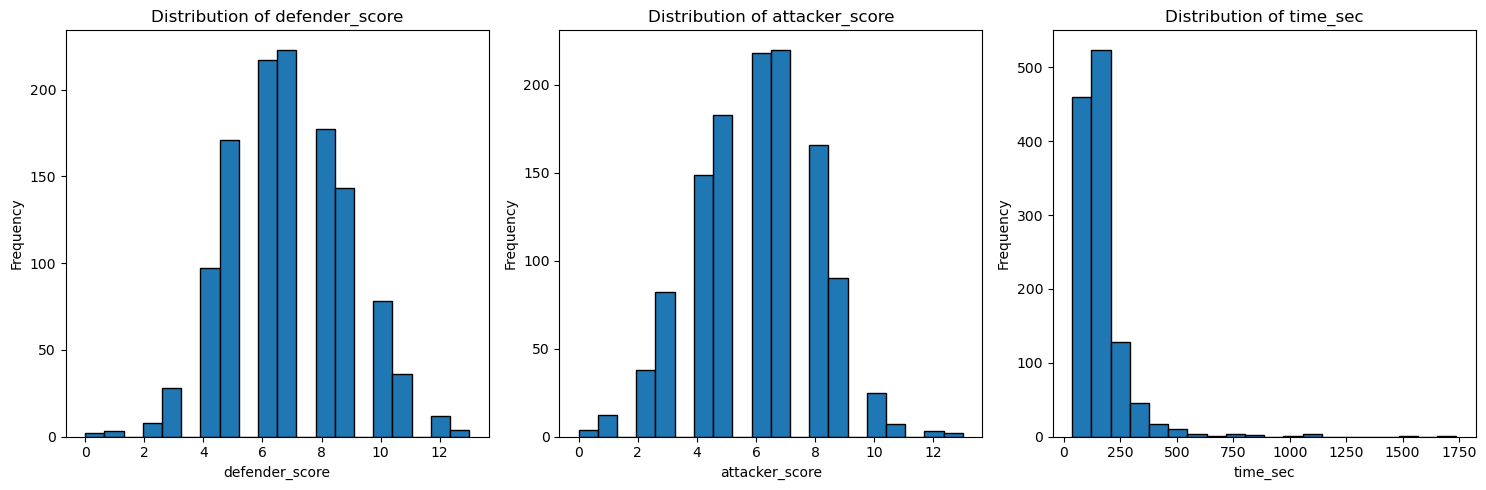

In [9]:
#Phase 3 EDA

import matplotlib.pyplot as plt
# Plot histograms for the numeric columns to visualize their distributions
numeric_columns = ['defender_score', 'attacker_score', 'time_sec']

plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_columns):
    plt.subplot(1, 3, i+1)
    plt.hist(df2[col], bins=20, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Defender score')

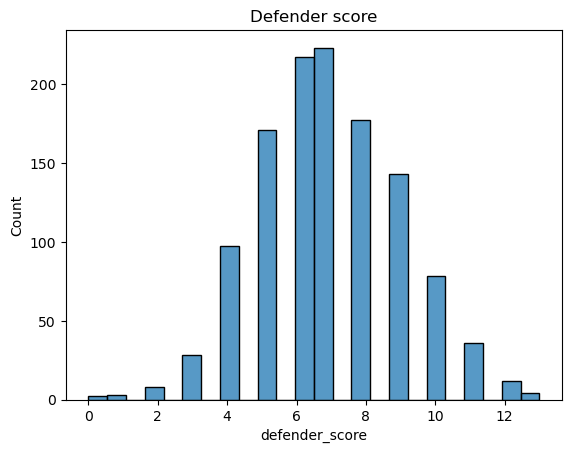

In [10]:
#Single Histogram Plot for the defender score
sns.histplot(data=df2, x="defender_score")
plt.title("Defender score")

[Text(0.5, 1.0, 'Time (Seconds)')]

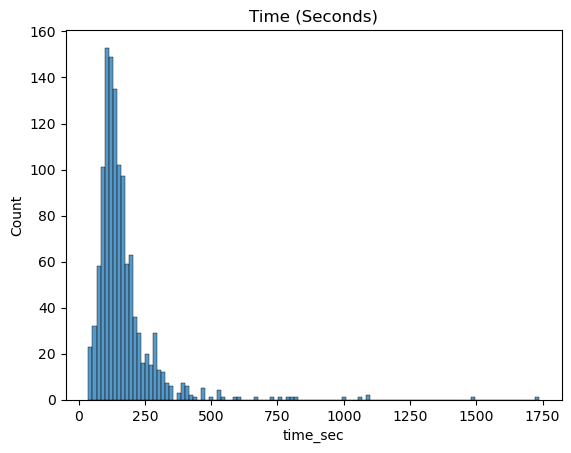

In [11]:
#Single Histogram Plot for the defender score
sns.histplot(data=df2, x="time_sec").set(title="Time (Seconds)")

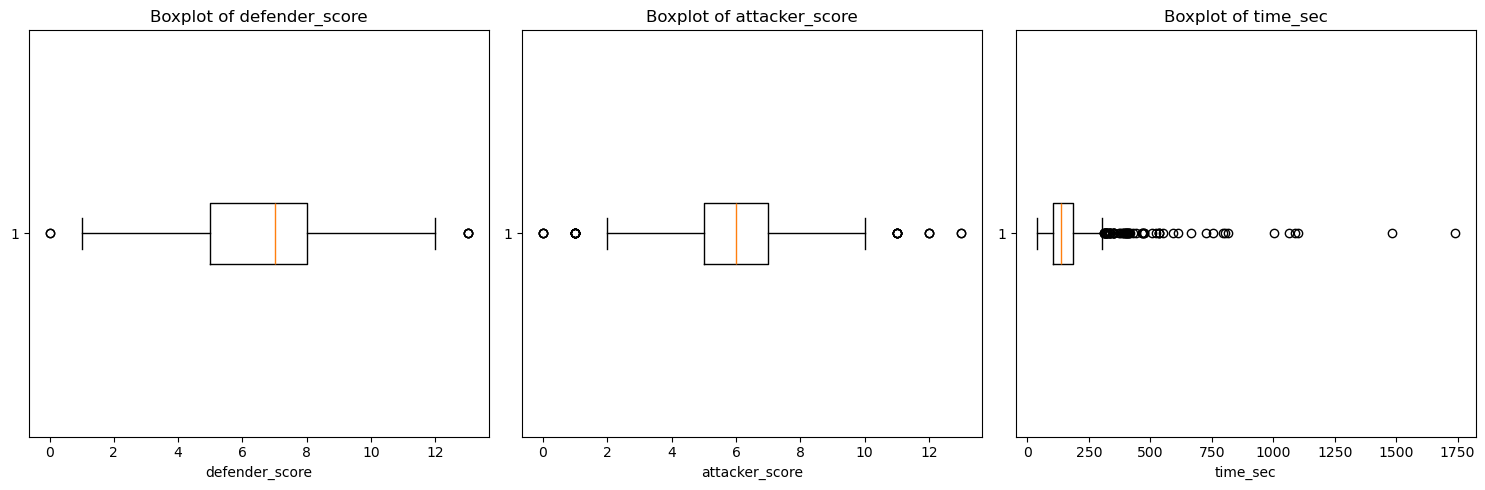

In [12]:
#Box Plot Showing the Defender Score, Attacker Score and Time in Seconds 
plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_columns):
    plt.subplot(1, 3, i+1)
    plt.boxplot(df2[col], vert=False)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Defender Score')

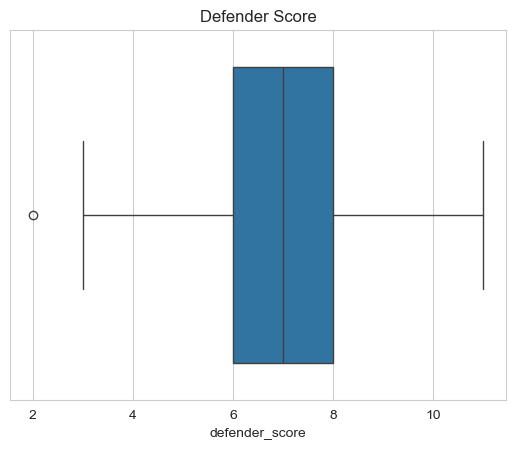

In [60]:
#Single Box Plot Sns    
sns.boxplot(data=df2, x="defender_score")
plt.title("Defender Score")

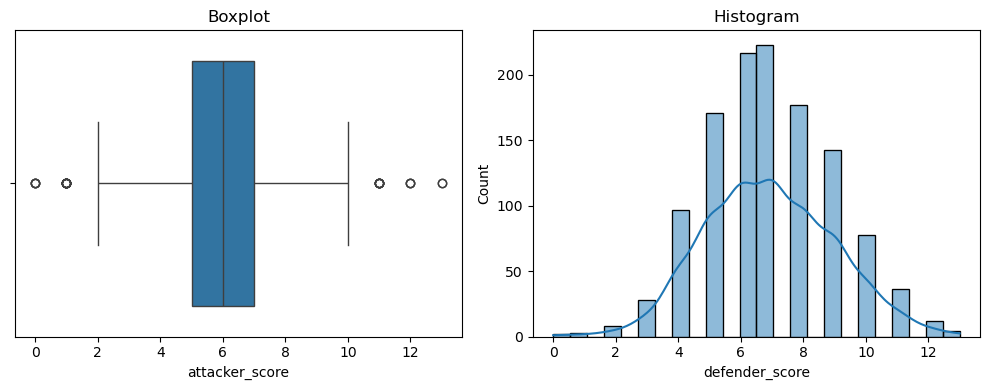

In [14]:
#Subplots with SNS

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4) )

# First subplot: Boxplot
sns.boxplot(x="attacker_score", data=df2, ax=axes[0])
axes[0].set_title("Boxplot")

# Second subplot: Histogram
sns.histplot(df2["defender_score"], kde=True, ax=axes[1])
axes[1].set_title("Histogram")

# Adjust layout
plt.tight_layout()
plt.show()

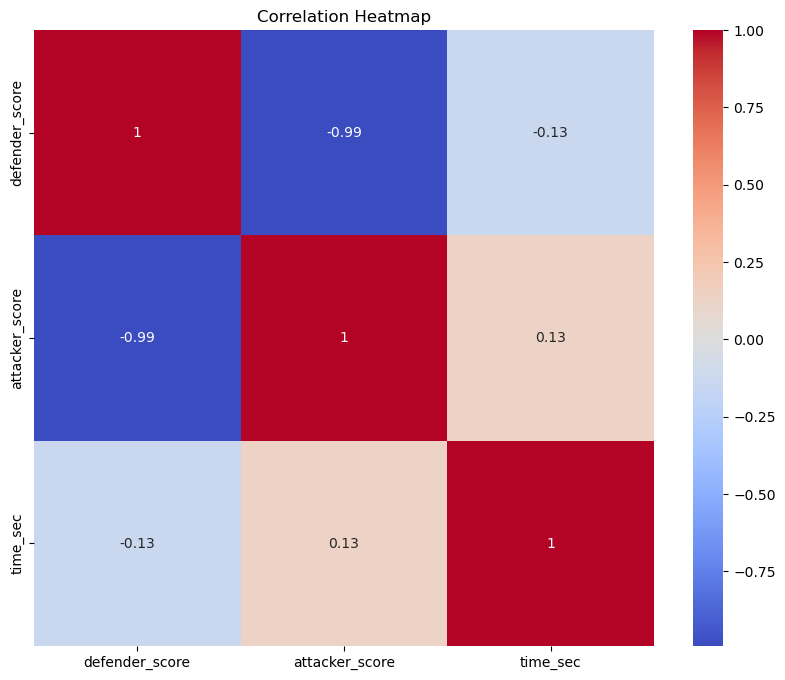

In [15]:
# Drop non-numeric columns for correlation analysis
# You can either drop or filter out non-numeric columns
numeric_df = df2.select_dtypes(include=['float64', 'int64'])

# Generate a correlation matrix
corr_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [16]:
# Function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from the numeric columns
cleaned_data = df2.copy()
for col in numeric_columns:
    cleaned_data = remove_outliers(cleaned_data, col)

# Check the number of rows after outlier removal
cleaned_data.shape, df2.shape  # Compare shape before and after cleaning
df2 = cleaned_data.copy()

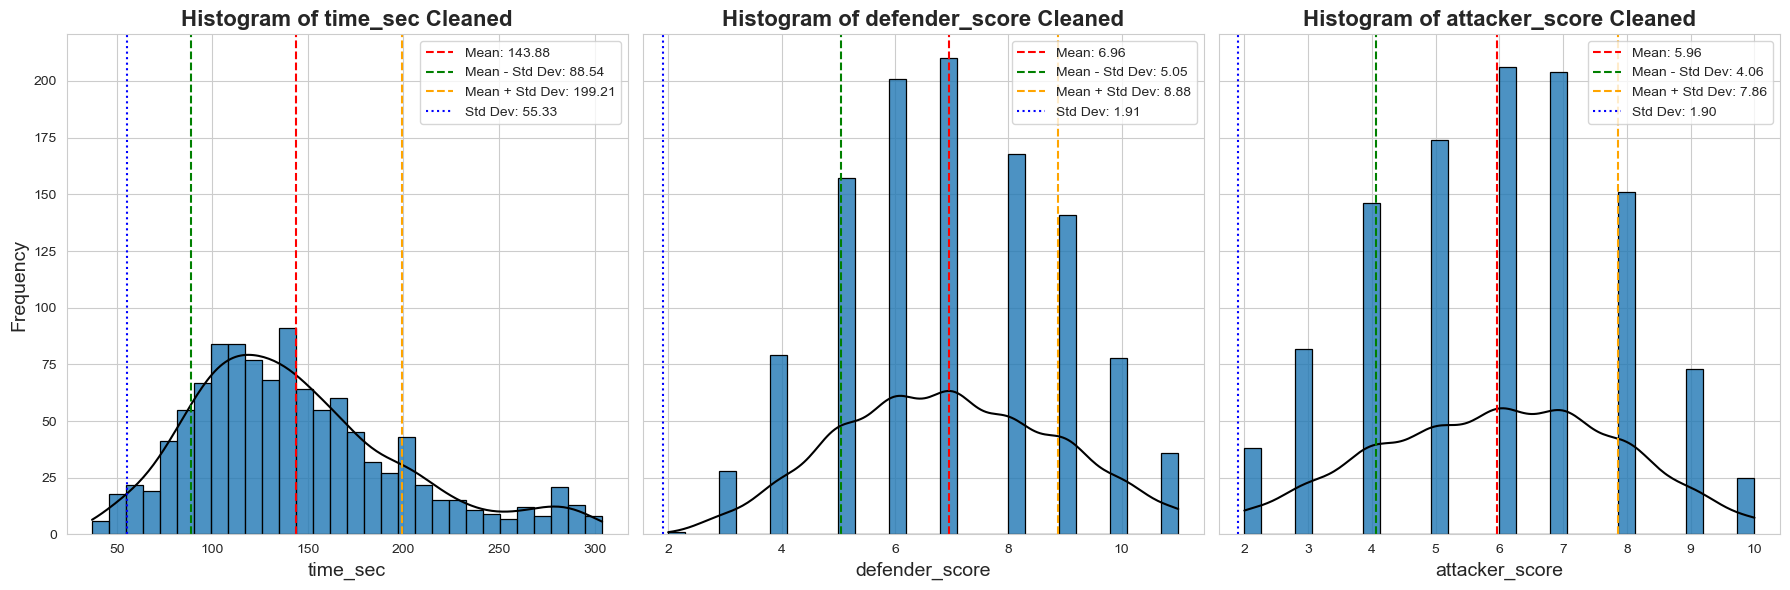

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set general style
sns.set_style("whitegrid")

# Create a figure with 3 subplots, arranged in 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Time Visualization
feature = 'time_sec'
data = df2[feature]
mean = np.mean(data)
std_dev = np.std(data)

ax = sns.histplot(data, bins=30, kde=True, edgecolor='black', alpha=0.8, ax=axes[0])
ax.lines[0].set_color('black')
axes[0].axvline(mean, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean:.2f}')
axes[0].axvline(mean - std_dev, color='green', linestyle='dashed', linewidth=1.5, label=f'Mean - Std Dev: {mean - std_dev:.2f}')
axes[0].axvline(mean + std_dev, color='orange', linestyle='dashed', linewidth=1.5, label=f'Mean + Std Dev: {mean + std_dev:.2f}')
axes[0].axvline(std_dev, color='blue', linestyle='dotted', linewidth=1.5, label=f'Std Dev: {std_dev:.2f}')
axes[0].legend(loc='upper right', fontsize=10)
axes[0].set_title(f'Histogram of {feature} Cleaned', fontsize=16, fontweight='bold')
axes[0].set_xlabel(feature, fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=14)

# Defender Score Visualization
feature = 'defender_score'
data = df2[feature]
mean = np.mean(data)
std_dev = np.std(data)

ax = sns.histplot(data, bins=30, kde=True, edgecolor='black', alpha=0.8, ax=axes[1])
ax.lines[0].set_color('black')
axes[1].axvline(mean, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean:.2f}')
axes[1].axvline(mean - std_dev, color='green', linestyle='dashed', linewidth=1.5, label=f'Mean - Std Dev: {mean - std_dev:.2f}')
axes[1].axvline(mean + std_dev, color='orange', linestyle='dashed', linewidth=1.5, label=f'Mean + Std Dev: {mean + std_dev:.2f}')
axes[1].axvline(std_dev, color='blue', linestyle='dotted', linewidth=1.5, label=f'Std Dev: {std_dev:.2f}')
axes[1].legend(loc='upper right', fontsize=10)
axes[1].set_title(f'Histogram of {feature} Cleaned', fontsize=16, fontweight='bold')
axes[1].set_xlabel(feature, fontsize=14)

# Attacker Score Visualization
feature = 'attacker_score'
data = df2[feature]
mean = np.mean(data)
std_dev = np.std(data)

ax = sns.histplot(data, bins=30, kde=True, edgecolor='black', alpha=0.8, ax=axes[2])
ax.lines[0].set_color('black')
axes[2].axvline(mean, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean:.2f}')
axes[2].axvline(mean - std_dev, color='green', linestyle='dashed', linewidth=1.5, label=f'Mean - Std Dev: {mean - std_dev:.2f}')
axes[2].axvline(mean + std_dev, color='orange', linestyle='dashed', linewidth=1.5, label=f'Mean + Std Dev: {mean + std_dev:.2f}')
axes[2].axvline(std_dev, color='blue', linestyle='dotted', linewidth=1.5, label=f'Std Dev: {std_dev:.2f}')
axes[2].legend(loc='upper right', fontsize=10)
axes[2].set_title(f'Histogram of {feature} Cleaned', fontsize=16, fontweight='bold')
axes[2].set_xlabel(feature, fontsize=14)

# Adjust layout to prevent overlap and ensure readability
plt.tight_layout()
plt.show()


In [18]:
#Phase 4 Preprocessing

# Calculate skewness for the cleaned numeric columns
skewness_values = df2[numeric_columns].skew()
skewness_values

#The time is rightly skewed but not in a bad way, its in the range still, to deal with the skewness we will apply a tranformation
#checking the level of skewwness
#Defender Score: 0.073 (close to 0, indicating a nearly symmetric distribution).
#Attacker Score: -0.079 (also close to 0, indicating a nearly symmetric distribution).
#Time (Sec): 0.806 (moderately right-skewed).


defender_score    0.084499
attacker_score   -0.077381
time_sec          0.791394
dtype: float64

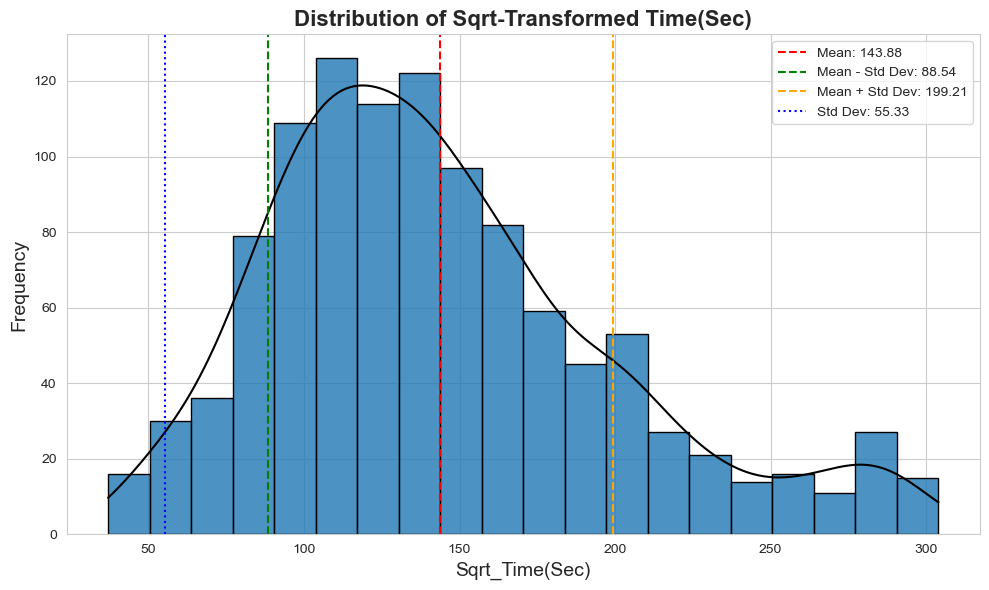

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Apply square root transformation
df2['sqrt_time_sec'] = np.sqrt(df2['time_sec'])
#df2['yeo_johnson'], _ = stats.yeojohnson(df2['time_sec'])
#df2['log_time_sec'] = np.log(df2['time_sec'])
# Calculate mean and standard deviation for the transformed data
feature = 'time_sec'
data = df2[feature]
mean = np.mean(data)
std_dev = np.std(data)

# Plot the distribution of the transformed 'Time(Sec)' column with lines for mean and standard deviation
plt.figure(figsize=(10, 6))
ax = sns.histplot(data, bins=20, edgecolor='black', kde=True, alpha=0.8)
ax.lines[0].set_color('black')

# Add vertical lines for mean and standard deviations
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean:.2f}')
plt.axvline(mean - std_dev, color='green', linestyle='dashed', linewidth=1.5, label=f'Mean - Std Dev: {mean - std_dev:.2f}')
plt.axvline(mean + std_dev, color='orange', linestyle='dashed', linewidth=1.5, label=f'Mean + Std Dev: {mean + std_dev:.2f}')
plt.axvline(std_dev, color='blue', linestyle='dotted', linewidth=1.5, label=f'Std Dev: {std_dev:.2f}')

# Customize plot
plt.legend(loc='upper right', fontsize=10)
plt.title('Distribution of Sqrt-Transformed Time(Sec)', fontsize=16, fontweight='bold')
plt.xlabel('Sqrt_Time(Sec)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.tight_layout()
plt.show()


In [20]:
df2.head()

,nickname,defender_score,attacker_score,time_sec,winner,level,sqrt_time_sec
0,u20444550,8.0,5.0,138.0,Defender,Expert,11.747340
1,u20444550,8.0,5.0,137.0,Defender,Expert,11.704700
2,u20444550,10.0,3.0,118.0,Defender,Expert,10.862780
3,u20444550,8.0,5.0,112.0,Defender,Expert,10.583005
4,u20444550,9.0,4.0,107.0,Defender,Expert,10.344080


In [21]:
#The %%time command is typically used in Jupyter Notebook environments, such as Jupyter Notebook or JupyterLab.
#It is called a "magic command" and is used to measure the execution time of a specific code cell.
#When you include %%time at the beginning of a cell, it tells Jupyter to measure the time it takes to run the code within
#that cell
#%%time

# Import various libraries and tools for building and evaluating machine learning models in Python
# Imported models: ensemble, random forest, SVM, Naive Bayes, genetic algorithm
# Imported evaluation metrics: accuracy, precision, recall, f1 score

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import StackingClassifier #ensmbl method of stacking classify for ensmbling
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


from sklearn.tree import DecisionTreeClassifier   #estimator in GA
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [22]:
# Step 1: Data Preprocessing

# Remove the 'Level' feature to avoid data leakage and any unnecessary columns
df2 = df2.drop(columns=['nickname'])




# Convert levels to numeric
level_encoder = LabelEncoder()
df2['level_numeric'] = level_encoder.fit_transform(df2['level'])

# Convert 'Winner' column to binary
winner_encoder = LabelEncoder()
df2['winner_binary'] = winner_encoder.fit_transform(df2['winner'])


# Define the input features (Defender Score, Attacker Score, Log Time)
X = df2[['sqrt_time_sec', 'level_numeric']]
y = df2['winner_binary']

# Split the data into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(df2.head())
# Output the shapes of the training and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

   defender_score  attacker_score  time_sec    winner   level  sqrt_time_sec  level_numeric  winner_binary
0             8.0             5.0     138.0  Defender  Expert      11.747340              1              1
1             8.0             5.0     137.0  Defender  Expert      11.704700              1              1
2            10.0             3.0     118.0  Defender  Expert      10.862780              1              1
3             8.0             5.0     112.0  Defender  Expert      10.583005              1              1
4             9.0             4.0     107.0  Defender  Expert      10.344080              1              1


((879, 2), (220, 2), (879,), (220,))

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils import class_weight

# Step 1: Initialize the Random Forest model with class_weight to handle imbalance
rf_classifier = RandomForestClassifier(random_state=100, class_weight='balanced')

# Step 2: Train the Random Forest model
rf_classifier.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = rf_classifier.predict(X_test)

# Step 4: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8909090909090909
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        95
           1       0.93      0.93      0.93       123
           2       0.00      0.00      0.00         2

    accuracy                           0.89       220
   macro avg       0.61      0.60      0.60       220
weighted avg       0.91      0.89      0.90       220

Confusion Matrix:
[[ 81   8   6]
 [  8 115   0]
 [  2   0   0]]


In [27]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Train the SVM model (if not already done)
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)

# Step 2: Predict on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Step 3: Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Step 4: Generate a classification report
classification_rep_svm = classification_report(y_test, y_pred_svm)

# Output the accuracy and classification report
print(f"SVM Accuracy: {accuracy_svm}")
print(f"Classification Report:\n{classification_rep_svm}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


SVM Accuracy: 0.9272727272727272
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        95
           1       1.00      0.89      0.94       123
           2       0.00      0.00      0.00         2

    accuracy                           0.93       220
   macro avg       0.62      0.63      0.62       220
weighted avg       0.93      0.93      0.92       220

Confusion Matrix:
[[ 95   0   0]
 [ 14 109   0]
 [  2   0   0]]


In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Train the Naive Bayes model
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Step 2: Predict on the test set
y_pred_nb = nb_classifier.predict(X_test)

# Step 3: Calculate accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Step 4: Generate a classification report
classification_rep_nb = classification_report(y_test, y_pred_nb)

# Output the accuracy and classification report
print(f"Naive Bayes Accuracy: {accuracy_nb}")
print(f"Classification Report:\n{classification_rep_nb}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.9272727272727272
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        95
           1       1.00      0.89      0.94       123
           2       0.00      0.00      0.00         2

    accuracy                           0.93       220
   macro avg       0.62      0.63      0.62       220
weighted avg       0.93      0.93      0.92       220

Confusion Matrix:
[[ 95   0   0]
 [ 14 109   0]
 [  2   0   0]]


In [31]:
from sklearn.linear_model import LogisticRegression


# Step 2: Define the base models
estimators = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('svm', SVC(random_state=42, probability=True)),  # Use probability=True for stacking
    ('nb', GaussianNB())
]

# Step 3: Define the Stacking Classifier with a meta-model (Logistic Regression)
stacking_classifier = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5  # 5-fold cross-validation
)

# Step 4: Train the Stacking Classifier
stacking_classifier.fit(X_train, y_train)

# Step 5: Predict on the test set
y_pred_stack = stacking_classifier.predict(X_test)

# Step 6: Evaluate the Stacking Classifier
accuracy_stack = accuracy_score(y_test, y_pred_stack)
classification_rep_stack = classification_report(y_test, y_pred_stack)

# Output the accuracy and classification report
print(f"Stacking Classifier Accuracy: {accuracy_stack}")
print(f"Classification Report:\n{classification_rep_stack}")

print(confusion_matrix(y_test, y_pred_stack))

Stacking Classifier Accuracy: 0.9318181818181818
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        95
           1       0.97      0.93      0.95       123
           2       0.00      0.00      0.00         2

    accuracy                           0.93       220
   macro avg       0.62      0.63      0.62       220
weighted avg       0.93      0.93      0.93       220

[[ 91   4   0]
 [  9 114   0]
 [  2   0   0]]


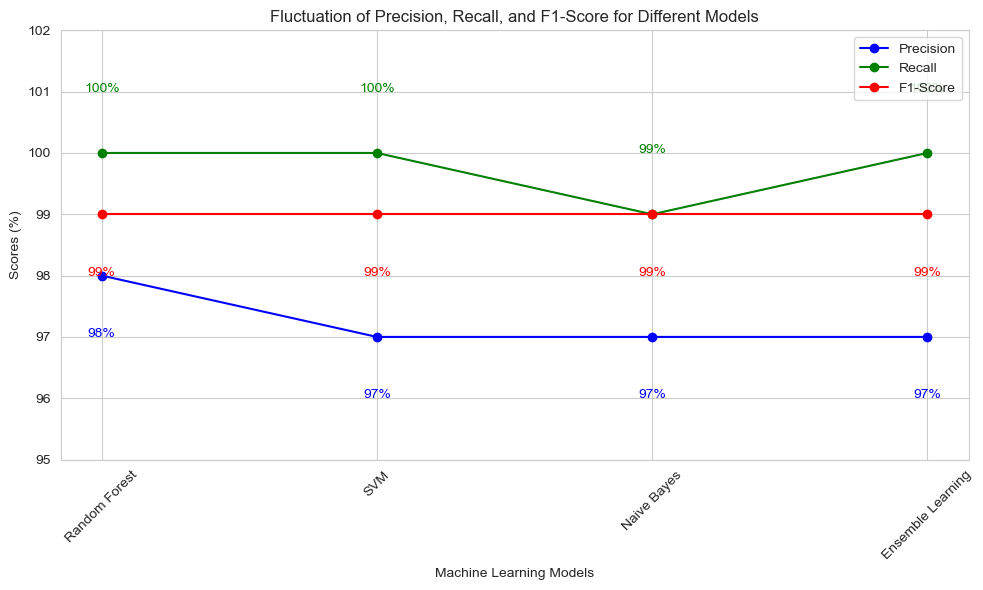

In [33]:
#Model Evaluation
#Plot the evaluation metrics of each model in one figure

# Model names
models = ['Random Forest', 'SVM', 'Naive Bayes', 'Ensemble Learning']

# Precision scores
precision = [98, 97, 97, 97]

# Recall scores
recall = [100, 100, 99, 100]

# F1-score scores
f1_score = [99, 99, 99, 99]

# X-axis values (models)
x = range(len(models))

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot precision scores
ax.plot(x, precision, marker='o', linestyle='-', color='b', label='Precision')

# Plot recall scores
ax.plot(x, recall, marker='o', linestyle='-', color='g', label='Recall')

# Plot F1-score scores
ax.plot(x, f1_score, marker='o', linestyle='-', color='r', label='F1-Score')

# Add value annotations for better clarity
for i, (p, r, f) in enumerate(zip(precision, recall, f1_score)):
    ax.text(i, p - 1, f'{p}%', ha='center', color='blue', fontsize=10)
    ax.text(i, r + 1, f'{r}%', ha='center', color='green', fontsize=10)
    ax.text(i, f - 1, f'{f}%', ha='center', color='red', fontsize=10)

# Set x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45)
ax.set_xlabel('Machine Learning Models')

# Set y-axis label
ax.set_ylabel('Scores (%)')

# Set y-axis limits for better clarity
ax.set_ylim(95, 102)

# Set plot title
ax.set_title('Fluctuation of Precision, Recall, and F1-Score for Different Models')

# Add a legend
ax.legend()

# Add grid for better readability
ax.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


In [35]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation (e.g., on Random Forest)
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy')

# Output cross-validation results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")


Cross-Validation Scores: [0.91477273 0.92613636 0.88636364 0.88068182 0.90285714]
Mean Cross-Validation Accuracy: 0.9021623376623376


In [37]:
#Naive-Bayes Classifier
from sklearn.model_selection import cross_val_score

# Perform cross-validation (e.g., on Naive Bayes)
cv_scores = cross_val_score(nb_classifier, X_train, y_train, cv=5, scoring='accuracy')

# Output cross-validation results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")


Cross-Validation Scores: [0.91477273 0.94886364 0.88636364 0.86931818 0.93142857]
Mean Cross-Validation Accuracy: 0.9101493506493507


In [39]:
#SVM
from sklearn.model_selection import cross_val_score

# Perform cross-validation (e.g., on SVM)
cv_scores = cross_val_score(svm_classifier, X_train, y_train, cv=5, scoring='accuracy')

# Output cross-validation results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")


Cross-Validation Scores: [0.91477273 0.94886364 0.88636364 0.86931818 0.93142857]
Mean Cross-Validation Accuracy: 0.9101493506493507


In [41]:
#Stacking Classifer
from sklearn.model_selection import cross_val_score

# Perform cross-validation (e.g., Ensemble learning)
cv_scores = cross_val_score(stacking_classifier, X_train, y_train, cv=5, scoring='accuracy')

# Output cross-validation results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")


Cross-Validation Scores: [0.93181818 0.95454545 0.90340909 0.875      0.92      ]
Mean Cross-Validation Accuracy: 0.9169545454545455


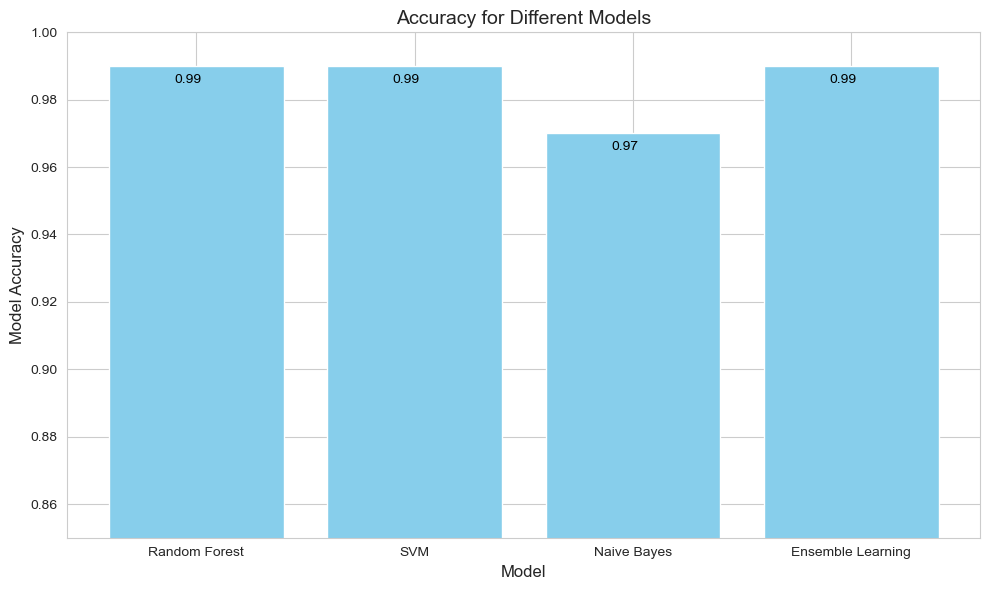

In [44]:
#Model Accuracy
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Define the model accuracies for each model
model_cv_accuracy = {
    'Model': ['Random Forest', 'SVM', 'Naive Bayes', 'Ensemble Learning'],
    'Model Accuracy': [0.99, 0.99, 0.97, 0.99]
}

# Step 2: Convert the dictionary to a DataFrame
cv_accuracy_df = pd.DataFrame(model_cv_accuracy)

# Step 3: Plot the bar chart with a clearer distinction of close values
plt.figure(figsize=(10, 6))
bars = plt.bar(cv_accuracy_df['Model'], cv_accuracy_df['Model Accuracy'], color='skyblue')

# Add value annotations to each bar for better clarity
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval - 0.005, f'{yval:.2f}', color='black')

# Add title and labels
plt.title('Accuracy for Different Models', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Model Accuracy', fontsize=12)

# Set a range for better visual distinction
plt.ylim(0.85, 1)

# Show the plot
plt.tight_layout()
plt.show()

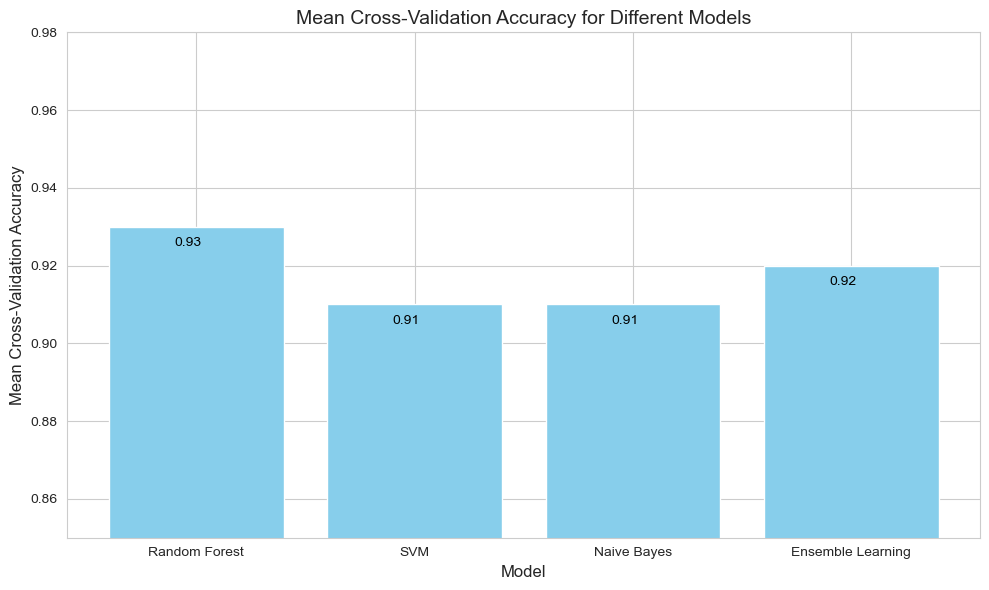

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Define the cross-validation accuracies for each model
model_cv_accuracy = {
    'Model': ['Random Forest', 'SVM', 'Naive Bayes', 'Ensemble Learning'],
    'Mean Cross-Validation Accuracy': [0.93, 0.91, 0.91, 0.92]  # Replace these with actual values
}

# Step 2: Convert the dictionary to a DataFrame
cv_accuracy_df = pd.DataFrame(model_cv_accuracy)

# Step 3: Plot the bar chart with a clearer distinction of close values
plt.figure(figsize=(10, 6))
bars = plt.bar(cv_accuracy_df['Model'], cv_accuracy_df['Mean Cross-Validation Accuracy'], color='skyblue')

# Add value annotations to each bar for better clarity
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval - 0.005, f'{yval:.2f}', color='black')

# Add title and labels
plt.title('Mean Cross-Validation Accuracy for Different Models', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Mean Cross-Validation Accuracy', fontsize=12)

# Set a range for better visual distinction
plt.ylim(0.85, 0.98)

# Show the plot
plt.tight_layout()
plt.show()


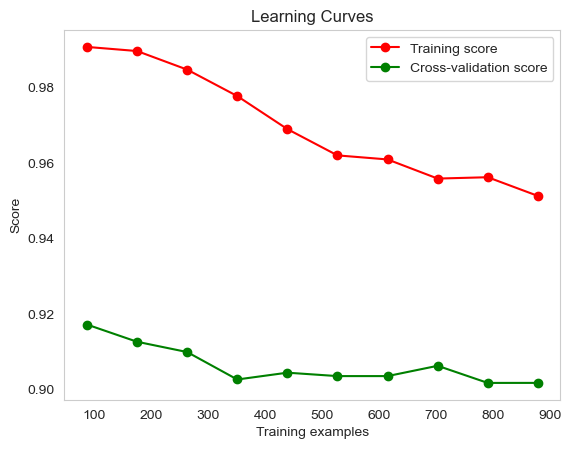

In [48]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    rf_classifier, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and std for training and testing scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curves
plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curves")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()

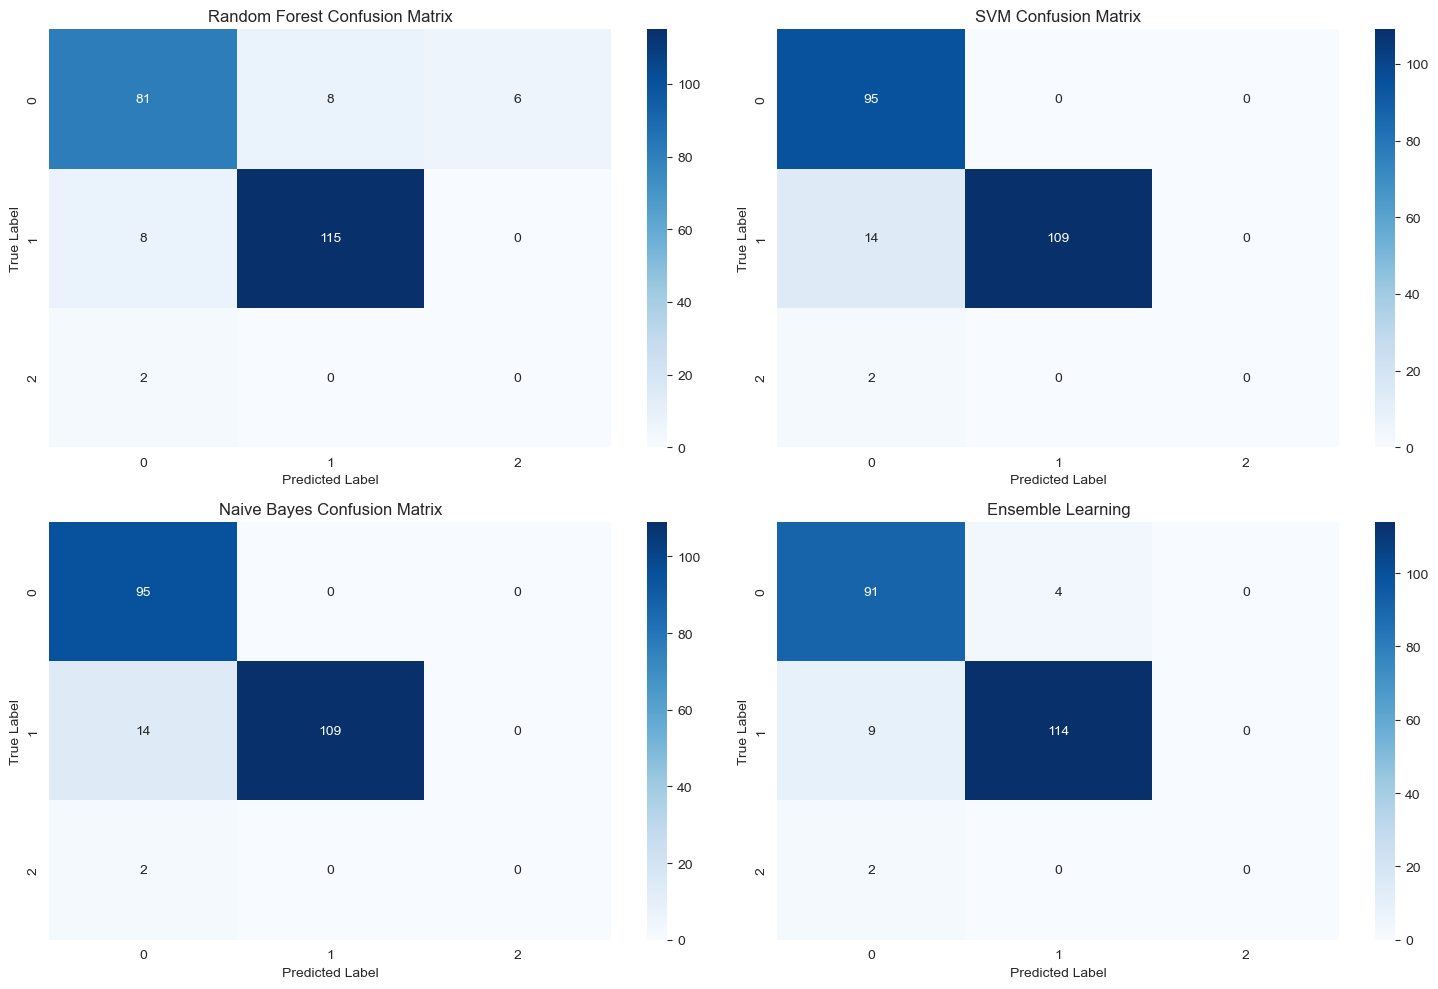

In [50]:
# prompt: generate the above materices 2 on the top and 2 on the bottom

# Assuming you have already trained and made predictions for each model

# Create a figure with 2 rows and 2 columns of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title, ax):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(title)
    ax.set_ylabel("True Label")
    ax.set_xlabel("Predicted Label")


# Plot confusion matrices for each model
plot_confusion_matrix(y_test, y_pred, "Random Forest Confusion Matrix", axes[0, 0])
plot_confusion_matrix(y_test, y_pred_svm, "SVM Confusion Matrix", axes[0, 1])
plot_confusion_matrix(y_test, y_pred_nb, "Naive Bayes Confusion Matrix", axes[1, 0])
plot_confusion_matrix(y_test, y_pred_stack, "Ensemble Learning", axes[1, 1])


# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

In [54]:
# # prompt: run the lazy predict algoritth

# from lazypredict.Supervised import LazyClassifier
# from sklearn.model_selection import train_test_split

# # Assuming you have X and y defined as your features and target variable

# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize the LazyClassifier
# clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# # Fit and predict with LazyClassifier
# models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# # Print the models and their performance metrics
# print(models)